# Exercises Hand-In 1
## Exercice 10
## Group 30 (Oliver Nilsson)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

# Print the versions of the libraries to check if they are installed correctly
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 1.5.3
Numpy version: 1.24.4
Matplotlib version: 3.8.4
Seaborn version: 0.13.2


### a) Load in the Boston data set, which is part of the ISLP library.

In [2]:
# Load the data
boston = load_data("Boston")
# Upper case the column names
boston.columns = boston.columns.str.upper()
# Display the first 5 rows of the data
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### b) How manny rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
# Print the number of rows and columns in the dataset
print(f"Number of rows: {boston.shape[0]}")
print(f"Number of columns: {boston.shape[1]}")

Number of rows: 506
Number of columns: 13


**Number of rows and columns:** 506 rows and 13 columns.</br>
The Boston data set contains housing values in 506 suburbs of Boston, where each row represents a suburb.</br>
Columns are features that can influence house price:
* **CRIM:** per capita crime rate by town.
* **ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS:** proportion of non-retail business acres per town.
* **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **NOX:** nitrogen oxides concentration (parts per 10 million).
* **RM:** average number of rooms per dwelling.
* **AGE:** proportion of owner-occupied units built prior to 1940.
* **DIS:** weighted mean of distances to five Boston employment centres.
* **RAD:** index of accessibility to radial highways.
* **TAX:** full-value property-tax rate per $10,000.
* **PTRATIO:** pupil-teacher ratio by town.
* **LSTAT:** lower status of the population (percent).
* **MEDV:** median value of owner-occupied homes in $1000s.

### c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

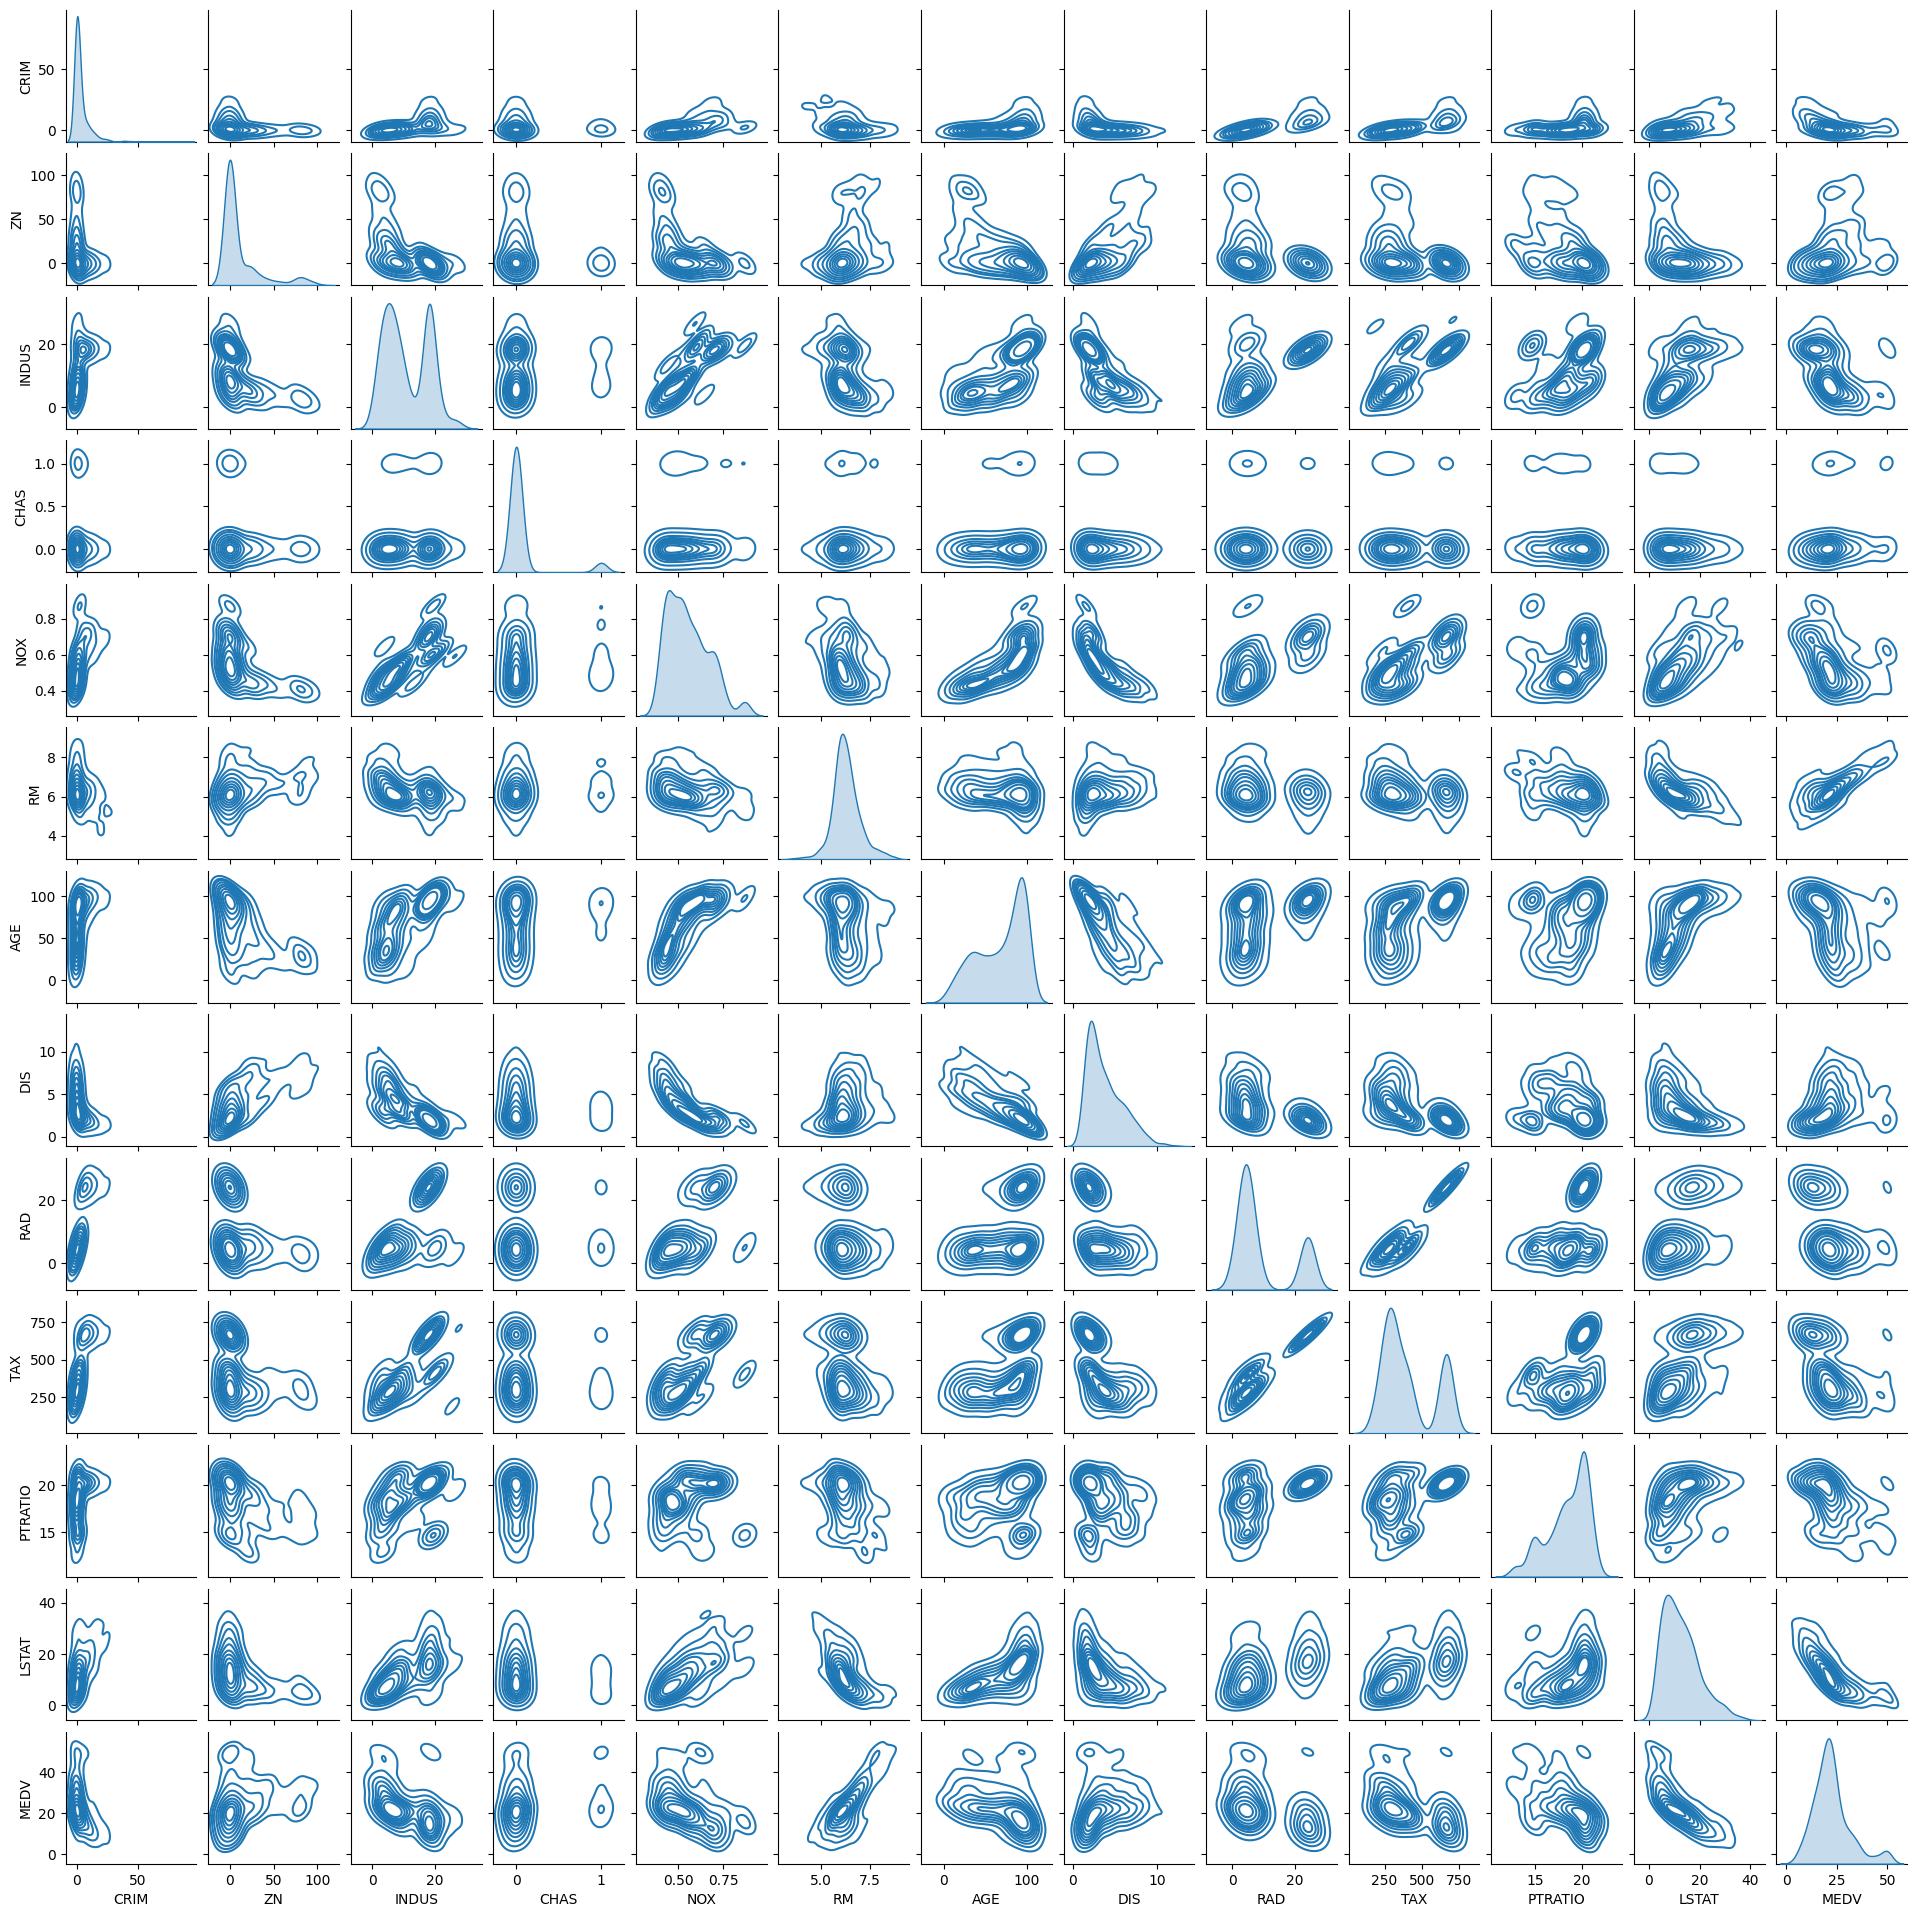

In [4]:
# Using seaborn pairplot to get a overiew of pairwise relationships in the dataset
# Using the kind parameter for a more clearer visualization
sns.pairplot(boston, height=1.5, kind='kde')

<Axes: xlabel='RM', ylabel='MEDV'>

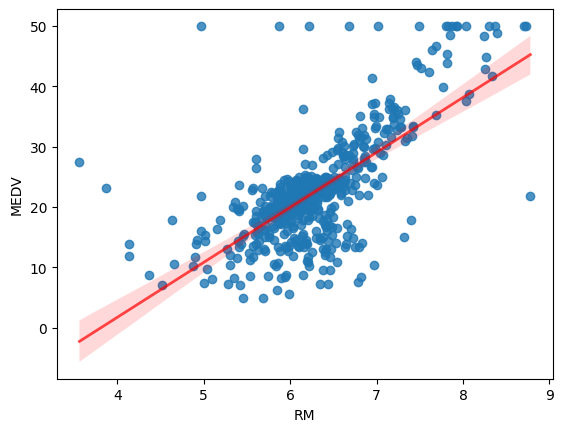

In [5]:
# Plotting a scatter plot of 'RM' and 'MEDV'
sns.regplot(x='RM', y='MEDV', data=boston, line_kws={"color":"r","alpha":0.7,"lw":2})

Lets look at the relationship between rooms (RM) and median value (MEDV).</br>
It seems to appear a positive linear relationship between the variable RM and the target variable. This outcome is anticipated since RM represents the number of rooms, implying that more rooms typically correlate with higher prices.

<Axes: xlabel='DIS', ylabel='NOX'>

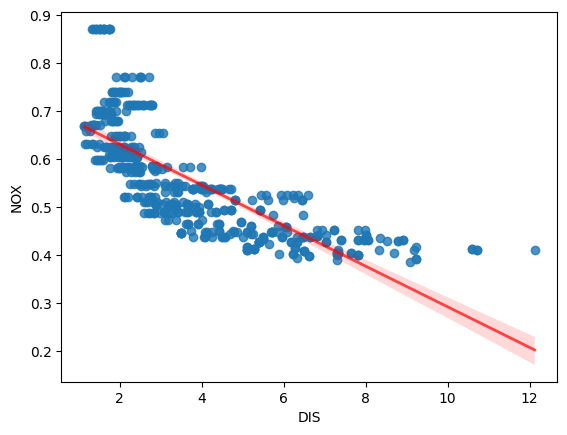

In [6]:
# Plotting the relationship between 'DIS' and 'NOX'
sns.regplot(x='DIS', y='NOX', data=boston, line_kws={"color":"r","alpha":0.7,"lw":2})

By analyzing the correlation between nitrogen oxides concentration (NOX) and the weighted distance to five Boston employment centers (DIS), it becomes evident that there's a negative relationship. This implies that as the distance from employment centers increases, the concentration of nitrogen oxides generally decreases. This correlation is logical since employment centers often generate higher emissions compared to other areas within the geographic region.

<Axes: xlabel='LSTAT', ylabel='RM'>

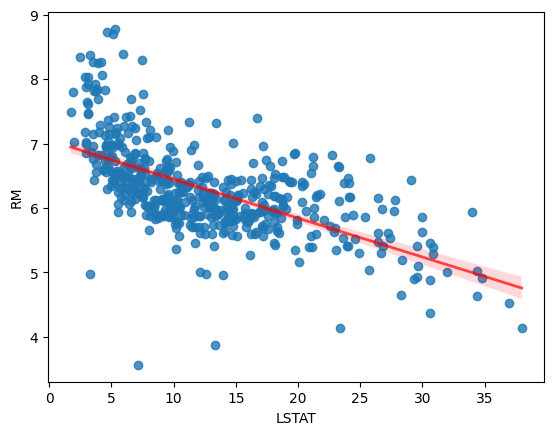

In [7]:
# Plotting the relationship between 'LSTAT' and 'RM'
sns.regplot(x='LSTAT', y='RM', data=boston, line_kws={"color":"r","alpha":0.7,"lw":2})

By examining the relationship between the percentage of lower-status individuals (LSTAT) and the number of rooms (RM), it becomes evident that the correlation is predominantly negative. This indicates that areas with a higher percentage of lower-status residents tend to have fewer rooms on average. This finding makes sense since people with less money can't afford bigger houses.

### d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [8]:
# Correlation between the features and the target variable
boston.corrwith(boston['CRIM']).sort_values(ascending=False)

CRIM       1.000000
RAD        0.625505
TAX        0.582764
LSTAT      0.455621
NOX        0.420972
INDUS      0.406583
AGE        0.352734
PTRATIO    0.289946
CHAS      -0.055892
ZN        -0.200469
RM        -0.219247
DIS       -0.379670
MEDV      -0.388305
dtype: float64

When we check the scatterplots from before and see how each thing is connected to 'CRIM', we'll focus on the three features that are most connected. These are RAD, which is about how easy it is to get to highways, TAX, which is about how much property tax you pay, and LSTAT, which is about the percentage of people in the area who have lower status.

<Axes: xlabel='RAD', ylabel='CRIM'>

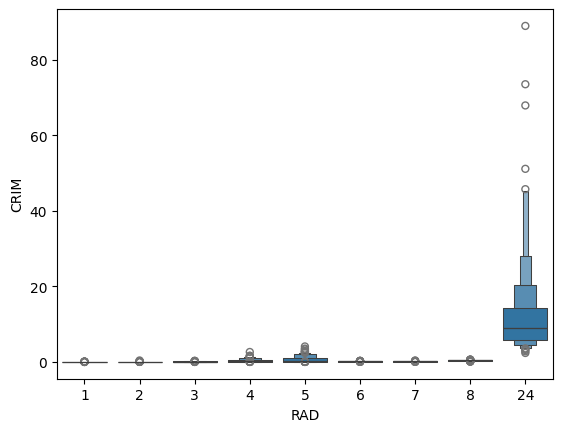

In [9]:
# Plotting a boxenplot to show the distribution of 'CRIM' for each value of 'RAD'
sns.boxenplot(x='RAD', y='CRIM', data=boston)

When RAD is at its highest value of 24, it means that there are more roads around. In these areas, the average CRIM, which is about crime, goes up by a lot. Also, the difference between the highest and lowest CRIM numbers becomes much bigger. This suggests that places with more roads nearby might have more crime happening.

The tax rate with the highest crime rate is: 666


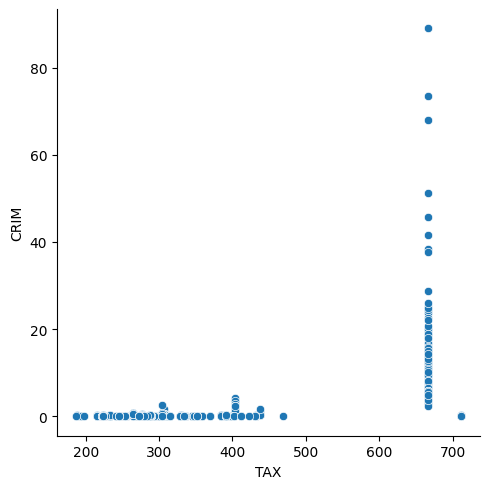

In [10]:
# Plot the relationship between 'TAX' and 'CRIM'
sns.relplot(x='TAX', y='CRIM', data=boston)

# Calculate the tax rate with the highest crime rate
print(f"The tax rate with the highest crime rate is: {boston.groupby('TAX')['CRIM'].mean().sort_values(ascending=False).index[0]}")

When the property TAX value reaches 666, indicating a high property tax rate, the average CRIM (crime rate) in the area significantly rises. Additionally, the range of CRIM values widens substantially. This suggests that areas with a tax rate of 666 might experience higher levels of crime compared to areas with lower tax rates. This finding highlights a potential association between property tax rates and crime rates in the studied locations.

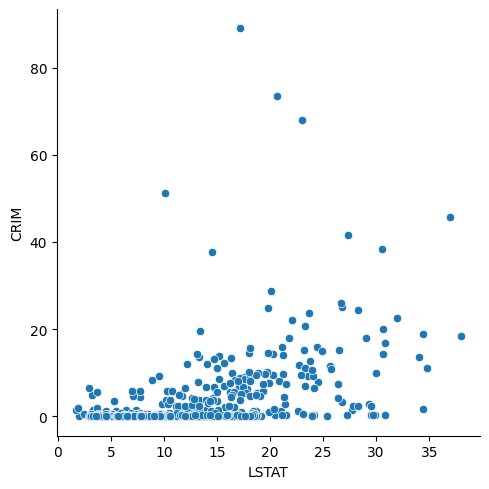

In [11]:
# Plotting the relationship between 'LSTAT' and 'CRIM'
sns.relplot(x='LSTAT', y='CRIM', data=boston)

When the LSTAT value is less than 10, the CRIM (crime rate) is always less than 10. But when LSTAT is more than 10, the CRIM numbers spread out more. When LSTAT is less than 20, many of the data points are very close to CRIM = 0. This means that areas with lower percentages of people with lower status tend to have lower crime rates, while areas with higher percentages of people with lower status can have a wider range of crime rates, with some areas having very little crime.

### e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [12]:
# Display the 5 suburbs with the highest crime rate
boston.nlargest(5, 'CRIM')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62,8.8
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0


In [13]:
# Display the 5 suburbs with the highest crime rate
boston.nlargest(5, 'TAX')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1


In [14]:
# Display the 5 suburbs with the highest pupil-teacher ratio
boston.nlargest(5, 'PTRATIO')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,8.05,18.2
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,5.57,20.6
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,17.19,16.2
128,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,15.39,18.0
129,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,18.34,14.3


In [15]:
# Display summary statistics for features crim, tax and ptratio
boston[['CRIM', 'TAX', 'PTRATIO']].describe()

,CRIM,TAX,PTRATIO
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


To determine if a feature is notably high, we first examine the top 5 suburbs for each feature and compare them to the median (50th percentile) in the descriptive table.

* The top 5 **CRIM** suburbs are **significantly higher** compared to the median.
* The top 5 **TAX** suburbs also exhibit **notably higher** values compared to the median.
* In contrast, the top 5 **PTRATIO** suburbs show relatively **similar** values to the median.


### f) How many of the suburbs in this data set bound the Charles river?

In [16]:
# Count the number of suburbs that bound the Charles river
print(f"Number of suburbs that bound the Charles river: {boston['CHAS'].value_counts()[1]}")

Number of suburbs that bound the Charles river: 35


### g) What is the median pupil-teacher ratio among the towns in this data set?

In [17]:
# Calculate the median pupil-teacher ratio
print(f"Median pupil-teacher ratio: {boston['PTRATIO'].median()}")

Median pupil-teacher ratio: 19.05


### h) Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [18]:
# Find the suburb with lowest median value of owner-occupied homes
print(f"Suburb with lowest median value of owner-occupied homes: {boston['MEDV'].idxmin()}")

# Display comparing descriptive statistics for the overall comparing to suburb 398
result = pd.concat([boston.describe(), boston.loc[398].rename('Suburb 398').to_frame().T])
# Transpose the result to make it easier to read
result.T

Suburb with lowest median value of owner-occupied homes: 398


,count,mean,std,min,25%,50%,75%,max,Suburb 398
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762,38.3518
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,0.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,18.1000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,0.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.6930
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,5.4530
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.4896
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,666.0000


**Suburb 398 Overview:**

- **CRIM:** High crime rate (38.3518) compared to median (0.25651).
- **ZN:** No residential land zoned for large lots.
- **INDUS:** High proportion of non-retail business acres.
- **NOX:** High nitric oxides concentration (0.693).
- **RM:** Fewer rooms per dwelling (5.453) compared to median (6.20850).
- **AGE:** High proportion of older housing units (100% built before 1940).
- **DIS:** Short distance to employment centers (1.4896).
- **RAD:** Maximum accessibility to highways (24).
- **TAX:** Maximum property-tax rate (666).
- **PTRATIO:** Maximum pupil-teacher ratio (20.2).
- **LSTAT:** High percentage of lower-status population (30.59) compared to median (11.36).
- **MEDV:** Lowest median home value ($5,000) compared to median ($21,200).

Suburb 398 exhibits several characteristics that deviate significantly from the median values, which may indicate unique socio-economic challenges.</br>
**Conclusion:**</br>
Suburb 398 stands out with exceptionally high crime rates, high property-tax rates, and a significant percentage of lower-status population. These factors, along with a higher proportion of older housing units and lower median home values, suggest that Suburb 398 may face distinct socio-economic challenges compared to other suburbs in the dataset.

### i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [19]:
# Calculate number of suburbs with number of rooms greater than 7 and 8
print(f"Number of suburbs with number of rooms greater than 7: {len(boston[boston['RM'] > 7])}")
print(f"Number of suburbs with number of rooms greater than 8: {len(boston[boston['RM'] > 8])}")

Number of suburbs with number of rooms greater than 7: 64
Number of suburbs with number of rooms greater than 8: 13


In [20]:
# Comment on the suburbs that have a number of rooms greater than 8 compared to overall
result = pd.concat([boston.describe(), boston[boston['RM'] > 8].median().rename('Median rm > 8').to_frame().T])
# Transpose the result to make it easier to read
result.T

,count,mean,std,min,25%,50%,75%,max,Median rm > 8
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762,0.52014
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,0.00000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,6.20000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,0.00000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.50700
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,8.29700
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,78.30000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,2.89440
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,7.00000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,307.00000


**Median Values for Suburbs with Rooms > 8:**

- **CRIM:** The median crime rate for suburbs with more than 8 rooms is notably lower (0.52014) compared to the overall median (0.25651).
- **ZN:** There is no residential land zoned for large lots (0.00) in suburbs with more than 8 rooms.
- **INDUS:** The proportion of non-retail business acres in these suburbs is considerably lower (6.2) compared to the overall median (9.69).
- **NOX:** Nitric oxides concentration is relatively low (0.507) in these suburbs compared to the overall median (0.538).
- **AGE:** The median proportion of older housing units in suburbs with more than 8 rooms is lower (78.3) compared to the overall median (77.5).
- **DIS:** The weighted distance to employment centers is higher (2.8944) in these suburbs compared to the overall median (3.20745).
- **RAD:** Accessibility to radial highways is lower (7.0) in these suburbs compared to the overall median (5.0).
- **TAX:** The property-tax rate is notably lower (307.0) in these suburbs compared to the overall median (330.0).
- **PTRATIO:** Pupil-teacher ratio is lower (17.4) in these suburbs compared to the overall median (19.05).
- **LSTAT:** The percentage of lower-status population is significantly lower (4.14) in these suburbs compared to the overall median (11.36).
- **MEDV:** Median home value is higher ($48,300) in these suburbs compared to the overall median ($21,200).

**Conclusion:**</br>
Suburbs with more than 8 rooms generally exhibit favorable socio-economic indicators such as lower crime rates, lower tax rates, and higher home values.